Following: http://gallery.pangeo.io/repos/pangeo-gallery/physical-oceanography/01_sea-surface-height.html

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import hvplot.xarray
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

In [2]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["sea_surface_height"].to_dask()
ds

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 8901)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    lon_bnds   (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2014-02-26T16:09:13Z
    date_issued:                     2014-01-06T00:00:00Z
    date_modified:                   2015-11-10T19:42:51Z
    geospatial_lat_max:              89.875
    geospatial_lat_min:              -89.875
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.875
    geospatial_lon_min:              0.125
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2014-02-26T16:09:13Z: created by DUACS D...
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        ERS-1, Topex/Poseidon
    processing_level:                L4
    product_version:                 5.0
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [3]:
ds_SO = ds.sel(latitude=slice(-90, -30))

In [4]:
from dask_gateway import Gateway
from dask.distributed import Client

gateway = Gateway()
cluster = gateway.new_cluster()
cluster.adapt(minimum=1, maximum=20)
cluster

In [5]:
client = Client(cluster)
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.db52aeb2e878474c95acedc7899bd89d Dashboard: /services/dask-gateway/clusters/prod.db52aeb2e878474c95acedc7899bd89d/status,Cluster Workers: 1 Cores: 2 Memory: 8.59 GB


In [6]:
ds_SO.nbytes/1e9

172.28357298

In [7]:
%%time
meanSSH = ds_SO.adt.mean('time')
meanSSH.load()

<xarray.DataArray 'adt' (latitude: 240, longitude: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.55741003, 0.55863018, 0.55862276, ..., 0.55382811, 0.55452683,
        0.55570519],
       [0.54690421, 0.54765065, 0.54721425, ..., 0.54517317, 0.54530013,
        0.54580054],
       [0.53587772, 0.53559893, 0.53469398, ..., 0.53827242, 0.53698969,
        0.53610289]])
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... -30.62 -30.38 -30.12
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

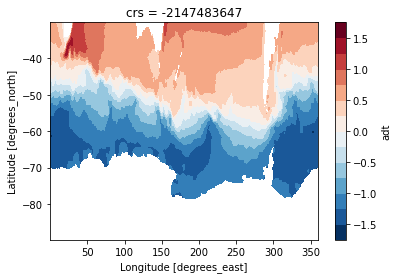

In [8]:
meanSSH.plot.contourf(levels=15)

In [9]:
%%time
EKE = 0.5*(ds_SO.ugosa**2 + ds_SO.vgosa**2).mean('time')
EKE.load()

CPU times: user 1.3 s, sys: 73.7 ms, total: 1.37 s
Wall time: 1min 4s


<xarray.DataArray (latitude: 240, longitude: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.01746615, 0.01709314, 0.01657663, ..., 0.01801851, 0.01811948,
        0.01787562],
       [0.01568796, 0.01547524, 0.01530356, ..., 0.01633004, 0.01627394,
        0.0160184 ],
       [0.01498425, 0.01487367, 0.01473863, ..., 0.01526787, 0.01533445,
        0.01519811]])
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... -30.62 -30.38 -30.12
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

(-80.0, -30.0)

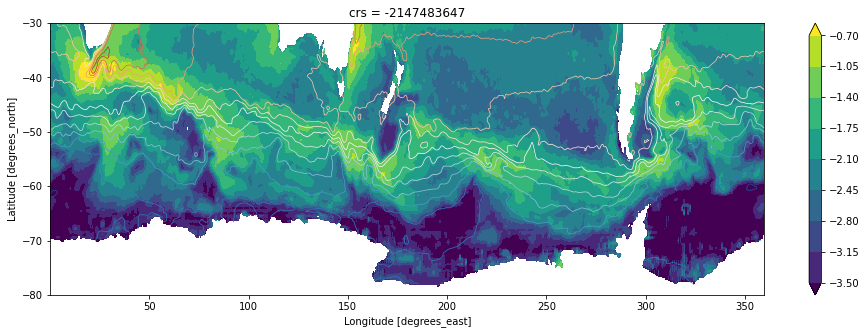

In [25]:
plt.figure(figsize=(16,5))
np.log10(EKE).plot.contourf(vmin=-3.5, vmax=-0.7, levels=9)
meanSSH.plot.contour(levels=15, linewidths=0.75)
plt.ylim([-80,-30])

In [17]:
%%time
MKE = 0.5*( (ds_SO.ugos - ds_SO.ugosa)**2 + (ds_SO.vgos - ds_SO.vgosa)**2).mean('time')
MKE.load()

CPU times: user 2.43 s, sys: 165 ms, total: 2.59 s
Wall time: 2min 5s


<xarray.DataArray (latitude: 240, longitude: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.00148485, 0.00151059, 0.00155859, ..., 0.00118553, 0.00129569,
        0.00140498],
       [0.00166626, 0.00184368, 0.00198843, ..., 0.00083535, 0.00112082,
        0.00142088],
       [0.00150632, 0.00170676, 0.00180824, ..., 0.00068135, 0.0009368 ,
        0.00123241]])
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... -30.62 -30.38 -30.12
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

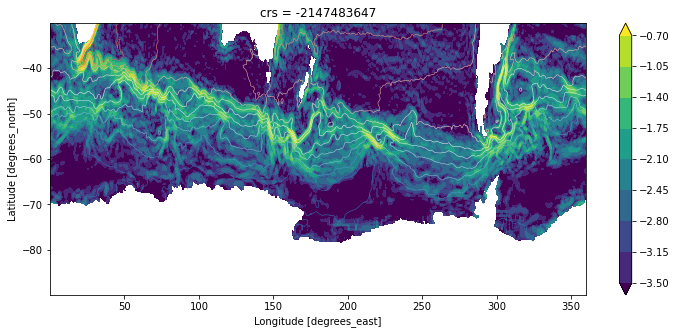

In [18]:
plt.figure(figsize=(12,5))
np.log10(MKE).plot.contourf(vmin=-3.5, vmax=-0.7, levels=9)
meanSSH.plot.contour(levels=15, linewidths=0.5)

In [20]:
ds_means = xr.Dataset()

In [21]:
ds_means['ADT'] = meanSSH
ds_means['EKE'] = EKE
ds_means['MKE'] = MKE

In [22]:
ds_means.to_netcdf('means_SSH.nc')